# <center><font color='magenta'>**DA3**</font></center>
# <center><font color='blue'>**Extra Assignment**</font></center>
# <center><font color='green'>**ShapIQ**</font></center>

<span style="font-size: 18px;">**2300715 - Saad Joiya**

<span style="font-size: 18px;">**ShapIQ is a Python library designed to provide advanced tools for interpretable machine learning, focusing on Shapley values and Shapley interaction values. It helps explain and visualize the behavior of complex machine learning models by quantifying the contribution of each feature to individual predictions. The goal is to make machine learning models more transparent and understandable.**

# Install ShapIQ

In [1]:
pip install shapiq

Note: you may need to restart the kernel to use updated packages.


# Preparing a Sample Dataset

<span style="font-size: 18px;">**We use the built california housing dataset for our analysis**

In [226]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


California housing dataset is a builtin dataset within the sklearn library. The features in the california housing datasets are as follows:

**Explanatory Features**

MedInc (Median Income): Median income of the district's residents (in $10,000).

HouseAge: Median age of houses in the district (in years).

AveRooms: Average number of rooms per house in the district.

AveOccup: Average number of people per household in the district.

Lat (Latitude): Latitude of the district.

Long (Longitude): Longitude of the district.

MedHouseVal (Median House Value): The target variable for regression, which is the median house value for the district (in $100,000s).
Population: The population of the district.


**Target Variable:**

y (Target Variable): The target variable for this dataset is the median house value (MedHouseVal) for each California district. This is what you are trying to predict based on the explanatory variables.

<span style="font-size: 18px;">**Checking correlations between Training Features**

In [230]:
type(data)

sklearn.utils._bunch.Bunch

In [234]:
import pandas as pd

# Check correlation between features
df = pd.DataFrame(X_train, columns=data.feature_names)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.121711,0.336013,-0.072550,0.004122,0.022061,-0.076571,-0.017040
HouseAge,-0.121711,1.000000,-0.160892,-0.087983,-0.292283,0.016245,0.005296,-0.101818
AveRooms,0.336013,-0.160892,1.000000,0.836163,-0.073733,-0.004922,0.110695,-0.029339
AveBedrms,-0.072550,-0.087983,0.836163,1.000000,-0.071267,-0.006035,0.073161,0.016647
Population,0.004122,-0.292283,-0.073733,-0.071267,1.000000,0.072330,-0.102499,0.094276
AveOccup,0.022061,0.016245,-0.004922,-0.006035,0.072330,1.000000,0.005837,-0.000598
Latitude,-0.076571,0.005296,0.110695,0.073161,-0.102499,0.005837,1.000000,-0.924485
Longitude,-0.017040,-0.101818,-0.029339,0.016647,0.094276,-0.000598,-0.924485,1.000000


# Training XGBoost model

In [5]:
import xgboost as xgb

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Computing Shaply Values & Interactions

In [7]:
pip install --upgrade shapiq

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shapiq as spq
import numpy as np
import random

Here, we define a predict function that will be used by the ShapIQ explainer to make predictions based on the trained model. 
This is the function that the explainer will call to compute the predicted values for specific input data.

In [ ]:
def predict(X):
    return model.predict(X)

The TabularExplainer is the main class in ShapIQ for generating Shapley and interaction values.
We pass in the predict function and X_train (training data) so that ShapIQ knows how to make predictions and what the model looks like.
Index="SII" is an identifier for the index/feature of your dataset. Max_order=2 specifies that the explainer will compute both first-order (Shapley) values and second-order interaction values. The max order determines how complex the interactions will be (1 for simple Shapley values, 2 for interactions between pairs of features).

In [ ]:
explainer = spq.TabularExplainer(model=predict, data=X_train, index="SII", max_order=2)

To speed up the computation (which can be very expensive), we are sampling a smaller subset of the test data (X_test). Instead of explaining all test samples, we are limiting it to a random subset of 500 (or fewer if the dataset is smaller). This step ensures we do not need to compute explanations for the entire test set, which could take a long time, especially if the dataset is large.

In [ ]:
sample_size = min(500, len(X_test))  # Reduce sample size
X_test_sampled = X_test[random.sample(range(len(X_test)), sample_size)]

Here, we compute the Shapley values and interaction values for each sampled instance from X_test_sampled. x.reshape(1, -1) ensures each data point is passed as a 2D array (required for the explainer). explainer.explain(x) generates the Shapley values and interaction values for the input data x.

In [ ]:
interaction_values_list = [explainer.explain(x.reshape(1, -1)) for x in X_test_sampled]

For each explanation in interaction_values_list, we extract the first-order Shapley values using get_n_order_values(1). These values represent the individual contribution of each feature in the model’s prediction for the given instance. 


The Shapley value tells you how much each feature adds to the final prediction.

In [ ]:
shap_values = [iv.get_n_order_values(1) for iv in interaction_values_list]

Here, we extract second-order interaction values using get_n_order_values(2). These values capture the interactions between pairs of features and how they jointly affect the prediction.

Interaction values tells us how the combination of two features contributes to the final output, beyond the sum of their individual effects.

In [139]:

shap_interactions = [iv.get_n_order_values(2) for iv in interaction_values_list]


# Visualizing the Results

## Shapley Values -> Feature Importance

<span style="font-size: 18px;">Shapley values are a concept from cooperative game theory that has been adapted for machine learning. In the context of a predictive model, a Shapley value represents the average contribution of a feature to the model's prediction for a given instance. It helps answer the question: "How much did each feature contribute to this specific prediction?"
ShapIQ computes Shapley values efficiently for tabular data, making it easy to understand the influence of features on model predictions.

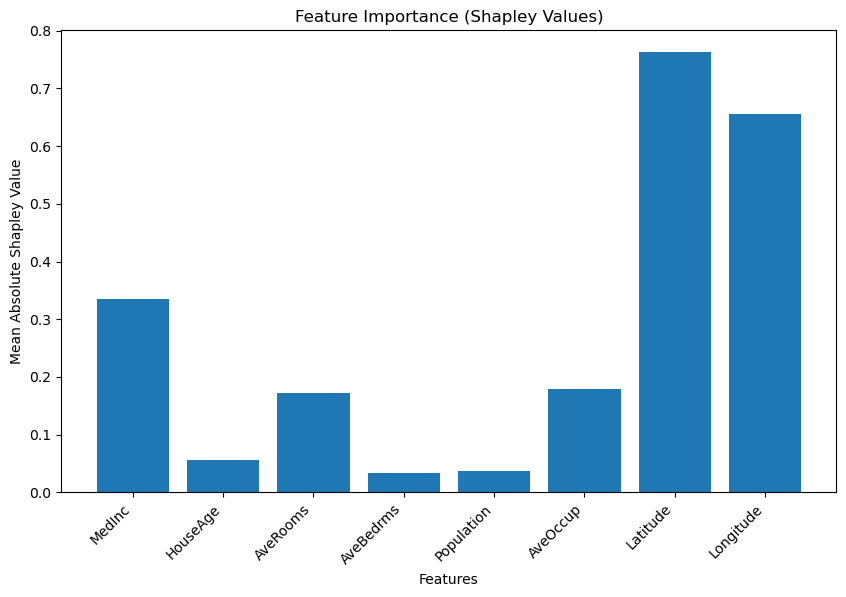

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy array for easy manipulation
shap_values_array = np.array(shap_values)

# Compute mean absolute SHAP values
mean_shap_values = np.mean(np.abs(shap_values_array), axis=0)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_shap_values)), mean_shap_values, tick_label=data.feature_names)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Mean Absolute Shapley Value")
plt.title("Feature Importance (Shapley Values)")
plt.show()


<span style="font-size: 18px;">This bar plot shows that the highest shaply values (feature importance) in terms of predicting house prices belongs to latitude followed by longitude. This tells us that housing prices are dominated by its districts location. Median Income of District's residents and Average Rooms/Occupation also seem important. This naturally flows as affluent neighborhoods would have expensive homes and homes with higher accomodation capacity have higher prices on average.

## Shapley Interactions

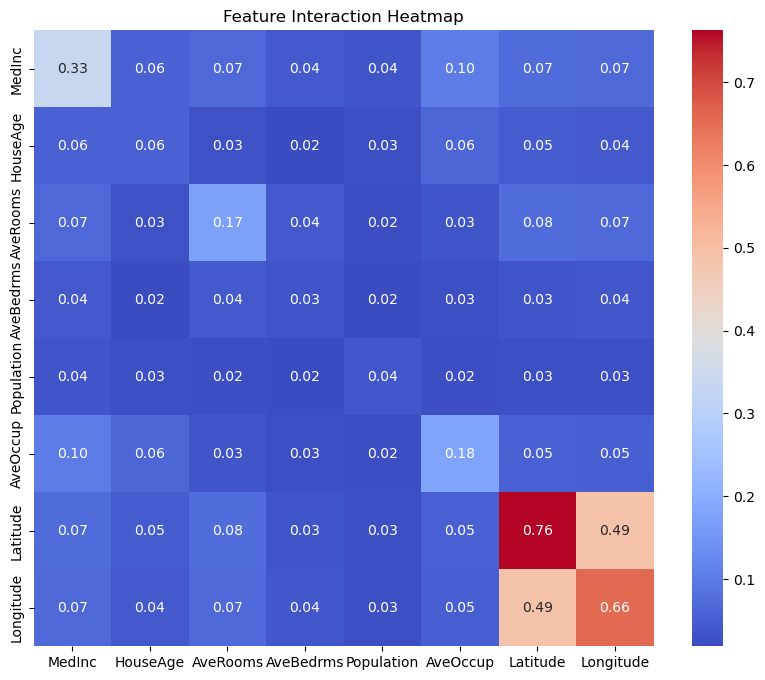

In [141]:
import seaborn as sns

# Convert to NumPy array
shap_interactions_array = np.array(shap_interactions)

# Compute mean interaction values across all instances
mean_shap_interactions = np.mean(np.abs(shap_interactions_array), axis=0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(mean_shap_interactions, annot=True, fmt=".2f", xticklabels=data.feature_names, yticklabels=data.feature_names, cmap="coolwarm")
plt.title("Feature Interaction Heatmap")
plt.show()


<span style="font-size: 18px;">Interaction values go beyond Shapley values by capturing the interactions between features. In other words, interaction values measure how the relationship between two features (or more) affects the model’s prediction, compared to when those features are treated independently.
This is important because in many cases, features do not have a simple, linear effect on predictions. Instead, the way one feature interacts with another can have a significant impact.
ShapIQ computes first-order (individual feature contributions) and higher-order (pairwise and more complex interactions) Shapley interaction values to give a deeper understanding of how features work together in the model.

## Feature Interaction Network -> Visualization using Networkx library

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

A new, empty graph G is created using the networkx library.

The graph will represent features (as nodes) and the interactions between them (as edges).

In [ ]:
G = nx.Graph()

# Add all features as node of the graph
for feature in data.feature_names:
    G.add_node(feature)

The code calculates a threshold for SHAP interaction values. Specifically, it takes the 10th percentile of the mean_shap_interactions array. This means that the smallest 10% of interaction values are discarded, and only interactions with a value higher than this threshold will be included as edges in the graph.

In [ ]:
threshold = np.percentile(mean_shap_interactions, 10) 

The code iterates over all pairs of features (i, j), where i < j. For each pair, it retrieves the SHAP interaction value from mean_shap_interactions[i, j].
If this interaction value exceeds the threshold, an edge is added between the two features (nodes) data.feature_names[i] and data.feature_names[j]. The edge is also assigned a weight attribute corresponding to the interaction value, which represents the strength of the interaction between those two features.

In [ ]:
for i in range(len(data.feature_names)):
    for j in range(i + 1, len(data.feature_names)): 
        interaction_value = mean_shap_interactions[i, j]
        if interaction_value > threshold:  # Only add edge if interaction is above threshold
            G.add_edge(data.feature_names[i], data.feature_names[j], weight=interaction_value)

This line prints the list of edges in the graph, including the weight of each edge. Each edge represents an interaction between two features, and the weight corresponds to the strength of that interaction.

In [142]:
print(G.edges(data=True))  # This should now show edges with weights

[('MedInc', 'HouseAge', {'weight': 0.05512152183138274}), ('MedInc', 'AveRooms', {'weight': 0.06796458060083181}), ('MedInc', 'AveBedrms', {'weight': 0.04249222011932754}), ('MedInc', 'Population', {'weight': 0.036072823696514975}), ('MedInc', 'AveOccup', {'weight': 0.1004110937661344}), ('MedInc', 'Latitude', {'weight': 0.07125865267471441}), ('MedInc', 'Longitude', {'weight': 0.07044223260100364}), ('HouseAge', 'AveRooms', {'weight': 0.02845571436667314}), ('HouseAge', 'Population', {'weight': 0.02592959270735135}), ('HouseAge', 'AveOccup', {'weight': 0.06418000754555596}), ('HouseAge', 'Latitude', {'weight': 0.04639626251790052}), ('HouseAge', 'Longitude', {'weight': 0.04497319743273112}), ('AveRooms', 'AveBedrms', {'weight': 0.04259894293218834}), ('AveRooms', 'AveOccup', {'weight': 0.03391856384053378}), ('AveRooms', 'Latitude', {'weight': 0.07588412524638252}), ('AveRooms', 'Longitude', {'weight': 0.06932849988050506}), ('AveBedrms', 'AveOccup', {'weight': 0.026617757575528523}),

In [143]:
threshold

0.02415050883041956

**This line extracts the weights of the edges in the graph. nx.get_edge_attributes(G, "weight") gets a dictionary of edges and their corresponding weights. The zip operation separates the edges and their weights into two separate lists: edges and weights.**

In [144]:
edges, weights = zip(*nx.get_edge_attributes(G, "weight").items()) if G.edges else ([], [])

This calculates the layout of the graph nodes using the spring layout algorithm, which positions nodes in a way that reduces edge crossings and makes the graph more visually appealing.

In [ ]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for visualization

This line extracts the weights of the edges in the graph. nx.get_edge_attributes(G, "weight") gets a dictionary of edges and their corresponding weights. The zip(*...) operation separates the edges and their weights into two separate lists: edges and weights

In [ ]:
edges, weights = zip(*nx.get_edge_attributes(G, "weight").items()) if G.edges else ([], [])

nx.draw(...): This is the function used to draw the graph. It specifies:
pos: the positions of the nodes.

with_labels=True: labels the nodes with their names (feature names).

node_color="lightblue": sets the color of the nodes to light blue.

edge_color=weights: colors the edges based on their weights (interaction values).

width=2: sets the width of the edges.

edge_cmap=plt.cm.Blues: applies a blue colormap to the edges based on their weights, with darker edges indicating stronger interactions.
plt.title("Feature Interaction Network"): Adds a title to the plot.

plt.show(): Displays the graph.

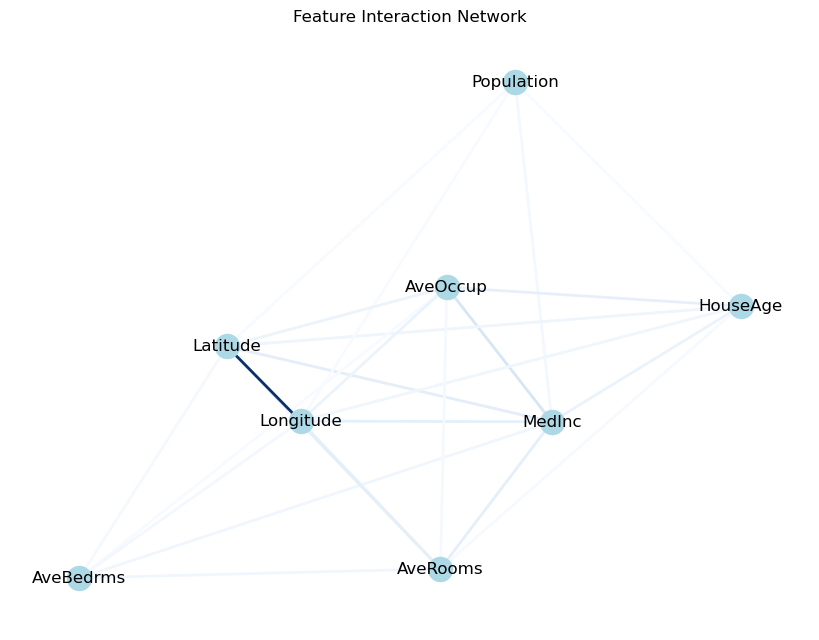

In [145]:
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color=weights, width=2, edge_cmap=plt.cm.Blues)
plt.title("Feature Interaction Network")
plt.show()


<span style="font-size: 18px;"> The output is a visual representation of the feature interaction network, where:

<span style="font-size: 18px;">Each node represents a feature from the dataset.

<span style="font-size: 18px;">Each edge represents a pair of features with a significant interaction (based on the threshold determined from SHAP values).

<span style="font-size: 18px;">The edges' color intensity indicates the strength of the interaction: darker edges indicate stronger interactions.

<span style="font-size: 18px;">The size of the graph and layout ensure that features with strong interactions are more closely positioned.

<span style="font-size: 18px;">This visualization allows you to easily identify which features are interacting with each other and how strongly, providing insights into the relationships between features in your model based on SHAP interactions.

<span style="font-size: 18px;"> This graph illustrates how different features and interactions would shape our predictions.